# MSN 514 - Chapter 02: Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Cosine and its derivatives

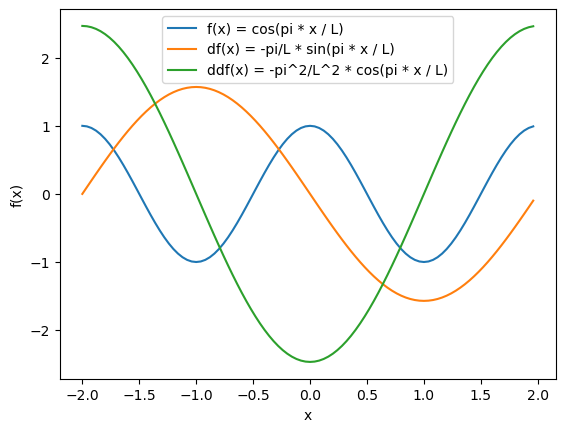

In [22]:
# Define a box from - L to L
N = 100
L = 2
x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

# Define a function f(x)
f = np.cos(2*np.pi * x / L)

# Define df(x)
df = -np.pi/L * np.sin(np.pi * x / L)

# Define ddf(x)
ddf = -(np.pi/L)**2 * np.cos(np.pi * x / L)

plt.plot(x, f, label='f(x) = cos(pi * x / L)')
plt.plot(x, df, label='df(x) = -pi/L * sin(pi * x / L)')
plt.plot(x, ddf, label='ddf(x) = -pi^2/L^2 * cos(pi * x / L)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


## Finite difference

Check out this awesome page;
https://web.media.mit.edu/~crtaylor/calculator.html

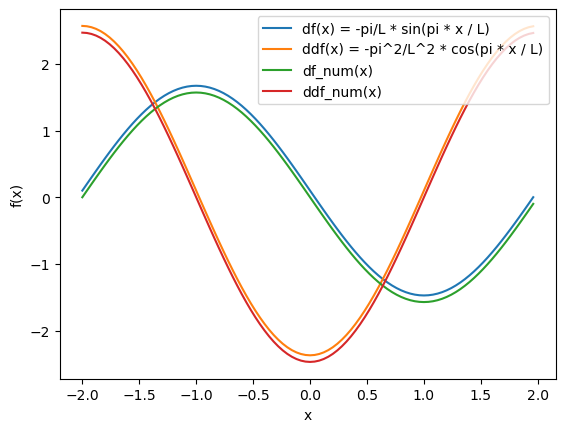

In [18]:
def num_der(f, dx, order, stencil):
    # Create Taylor series matrix
    A = []
    for n in range(len(stencil)):
        A.append(stencil**n)
    A = np.array(A)

    # Create right hand side vector
    d = np.zeros((len(stencil),1))
    d[order] = math.factorial(order)

    # Solve for the coefficients
    c = np.dot(np.linalg.inv(A),d)

    # Create the derivative
    a = [np.roll(f, -i) for i in stencil]
    g = np.dot(c.flatten(), a)/dx**order
    return g, c

# Compute the derivative
order = 1
stencil = np.array([-1, 0, 1])
df_num, c1 = num_der(f, dx, order, stencil)

order = 2
stencil = np.array([-1, 0, 1])
ddf_num, c2 = num_der(f, dx, order, stencil)

# Plot the derivative
plt.plot(x, df+0.1, label='df(x) = -pi/L * sin(pi * x / L)')
plt.plot(x, ddf+0.1, label='ddf(x) = -pi^2/L^2 * cos(pi * x / L)')
plt.plot(x, df_num, label='df_num(x)')
plt.plot(x, ddf_num, label='ddf_num(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()



### What is roll

In [15]:
u = np.array([1, 2, 3, 4, 5])
np.roll(u, -2)
np.shape(u)

d = np.random.random((3,4))
print(d.flatten())

[0.62193223 0.80808526 0.75711172 0.22150328 0.41264966 0.82730279
 0.80022318 0.82279798 0.26670373 0.78739573 0.07376952 0.35450179]


### Error analysis

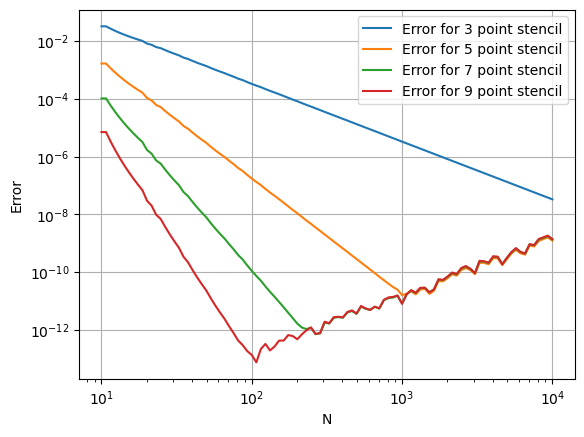

In [21]:
def num_error(N, order, stencil):
    # Define a box from - L to L
    L = 2
    x = np.linspace(-L, L, N, endpoint=False)
    dx = x[1] - x[0]

    # Define a function f(x)
    f = np.cos(np.pi * x / L)

    # Define df(x)
    df = -np.pi/L * np.sin(np.pi * x / L)

    # Define ddf(x)
    ddf = -(np.pi/L)**2 * np.cos(np.pi * x / L)

    # Compute the derivative
    if order == 1:
        df_num, c1 = num_der(f, dx, order, stencil)
        error = np.sqrt(np.sum((df - df_num)**2))/np.sqrt(np.sum(df**2))
    elif order == 2:
        ddf_num, c2 = num_der(f, dx, order, stencil)
        error = np.sqrt(np.sum((ddf - ddf_num)**2))/np.sqrt(np.sum(ddf**2))

    return error

order = 2
st_3 = np.arange(-1,2) # -1, 0, 1
st_5 = np.arange(-2,3) # -2, -1, 0, 1, 2
st_7 = np.arange(-3,4)
st_9 = np.arange(-4,5)

N = np.logspace(1,4,100) # 10^1 to 10^3
st_3_error_N = np.zeros_like(N)
st_5_error_N = np.zeros_like(N)
st_7_error_N = np.zeros_like(N)
st_9_error_N = np.zeros_like(N)
for i in range(len(N)):
    st_3_error_N[i] = num_error(int(N[i]), order, st_3)
    st_5_error_N[i] = num_error(int(N[i]), order, st_5)
    st_7_error_N[i] = num_error(int(N[i]), order, st_7)
    st_9_error_N[i] = num_error(int(N[i]), order, st_9)

plt.figure()
plt.loglog(N,st_3_error_N,label='Error for 3 point stencil')
plt.loglog(N,st_5_error_N,label='Error for 5 point stencil')
plt.loglog(N,st_7_error_N,label='Error for 7 point stencil')
plt.loglog(N,st_9_error_N,label='Error for 9 point stencil')
plt.xlabel('N')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()    

## Fast Fourier transform (FFT)

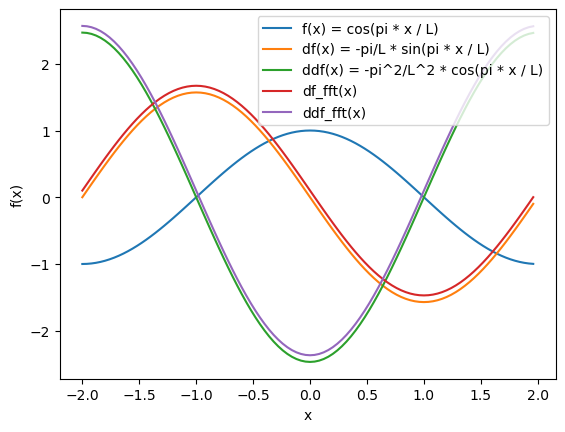

In [24]:
# Define a box from - L to L
N = 100
L = 2
x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

# Define a function f(x)
f = np.cos(np.pi * x / L)

# Define df(x)
df = -np.pi/L * np.sin(np.pi * x / L)

# Define ddf(x)
ddf = -(np.pi/L)**2 * np.cos(np.pi * x / L)

# Calculate the derivative df using the FFT
f_hat = np.fft.fft(f)
k = 2 * np.pi * np.fft.fftfreq(N, dx)
df_hat = 1j * k * f_hat
df_fft = np.fft.ifft(df_hat).real

# Calculate the derivative ddf using the FFT
ddf_hat = -k**2 * f_hat
ddf_fft = np.fft.ifft(ddf_hat).real

plt.plot(x, f, label='f(x) = cos(pi * x / L)')
plt.plot(x, df, label='df(x) = -pi/L * sin(pi * x / L)')
plt.plot(x, ddf, label='ddf(x) = -pi^2/L^2 * cos(pi * x / L)')
plt.plot(x, df_fft+0.1, label='df_fft(x)')
plt.plot(x, ddf_fft+0.1, label='ddf_fft(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Error analysis

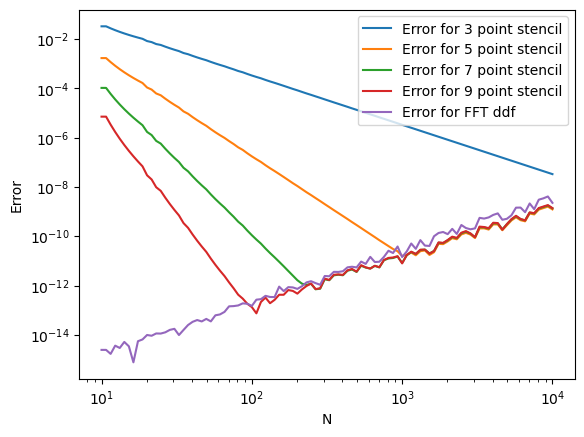

In [27]:
def fft_error(N):
    # Define a box from - L to L
    L = 2
    x = np.linspace(-L, L, N, endpoint=False)
    dx = x[1] - x[0]

    # Define a function f(x)
    f = np.cos(np.pi * x / L)

    # Define df(x)
    df = -np.pi/L * np.sin(np.pi * x / L)

    # Define ddf(x)
    ddf = -(np.pi/L)**2 * np.cos(np.pi * x / L)

    # Calculate the derivative df using the FFT
    f_hat = np.fft.fft(f)
    k = 2 * np.pi * np.fft.fftfreq(N, dx)
    df_hat = 1j * k * f_hat
    df_fft = np.fft.ifft(df_hat).real

    # Calculate the derivative ddf using the FFT
    ddf_hat = -k**2 * f_hat
    ddf_fft = np.fft.ifft(ddf_hat).real

    error_df = np.sqrt(np.sum((df - df_fft)**2))/np.sqrt(np.sum(df**2))
    error_ddf = np.sqrt(np.sum((ddf - ddf_fft)**2))/np.sqrt(np.sum(ddf**2))

    return error_df, error_ddf

order = 2
N = np.logspace(1,4,100)
st_3_error_N = np.zeros_like(N)
st_5_error_N = np.zeros_like(N)
st_7_error_N = np.zeros_like(N)
st_9_error_N = np.zeros_like(N)
df_fft_error_N = np.zeros_like(N)
ddf_fft_error_N = np.zeros_like(N)
for i in range(len(N)):
    st_3_error_N[i] = num_error(int(N[i]), order, st_3)
    st_5_error_N[i] = num_error(int(N[i]), order, st_5)
    st_7_error_N[i] = num_error(int(N[i]), order, st_7)
    st_9_error_N[i] = num_error(int(N[i]), order, st_9)
    df_fft_error_N[i], ddf_fft_error_N[i] = fft_error(int(N[i]))

plt.figure()
plt.loglog(N,st_3_error_N,label='Error for 3 point stencil')
plt.loglog(N,st_5_error_N,label='Error for 5 point stencil')
plt.loglog(N,st_7_error_N,label='Error for 7 point stencil')
plt.loglog(N,st_9_error_N,label='Error for 9 point stencil')
# plt.loglog(N,df_fft_error_N,label='Error for FFT df')
plt.loglog(N,ddf_fft_error_N,label='Error for FFT ddf')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()  

In [56]:
stencil = np.array([-1, 0, 1, 2, 3])
order = 2
g, c = num_der(f, dx, order, stencil)
print(c)

[[ 0.91666667]
 [-1.66666667]
 [ 0.5       ]
 [ 0.33333333]
 [-0.08333333]]


## Heat diffusion

### Using FFT

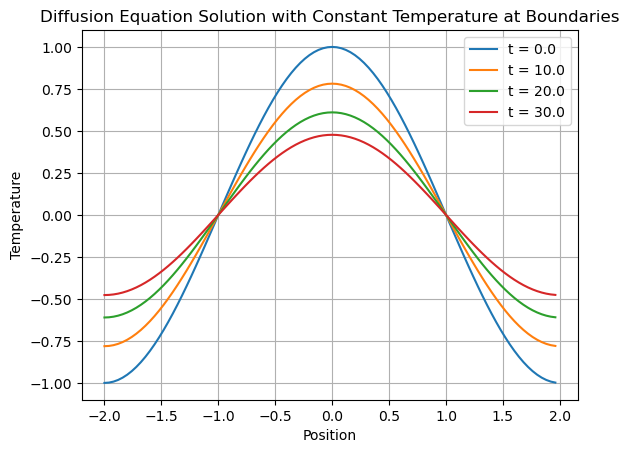

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2.0  # Length of the domain
D = 0.01  # Diffusion coefficient

# Discretization
N = 100  # Number of spatial points
x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

# Initial condition
u0 = np.cos(np.pi * x/L)

# Compute wavenumbers
k = 2 * np.pi * np.fft.fftfreq(N, dx)

# Fourier transform
u_hat0 = np.fft.fft(u0)

# Solve the diffusion equation in Fourier space
for t in [0, 10, 20, 30]:
    u_hat = u_hat0 * np.exp(-D * k**2 * t)
    u = np.fft.ifft(u_hat)
    
    plt.plot(x, u.real, label='t = %.1f' % t)
    
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Diffusion Equation Solution with Constant Temperature at Boundaries')
plt.grid(True)
plt.legend()
plt.show()


### Using finite difference

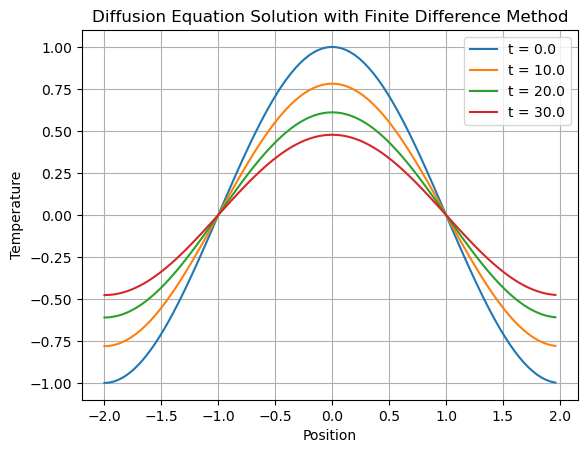

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters
L = 2.0  # Length of the domain
D = 0.01  # Diffusion coefficient

# Time-stepping
t = 0
dt = 0.01

# Discretization
N = 100  # Number of spatial points
x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

# Initial condition
u0 = np.cos(np.pi * x/L)

u = u0

A = np.diag(-2*np.ones(N)) + \
    np.diag(1*np.ones(N-1), k=1) + \
    np.diag(1*np.ones(N-1), k=-1)
A[0, N-1] = 1
A[N-1, 0] = 1

A = A * D / dx**2
U = expm(A * dt)

tmax = 30.1
while t < tmax:
    if (t % 10) < dt:
        plt.plot(x, u, label='t = %.1f' % t)
        plt.xlabel('Position')
        plt.ylabel('Temperature')
        plt.title('Diffusion Equation Solution with Finite Difference Method')
        plt.grid(True)
        plt.legend()

    # Time-stepping
    u = np.dot(U, u)
    t += dt

### Boundary Conditions

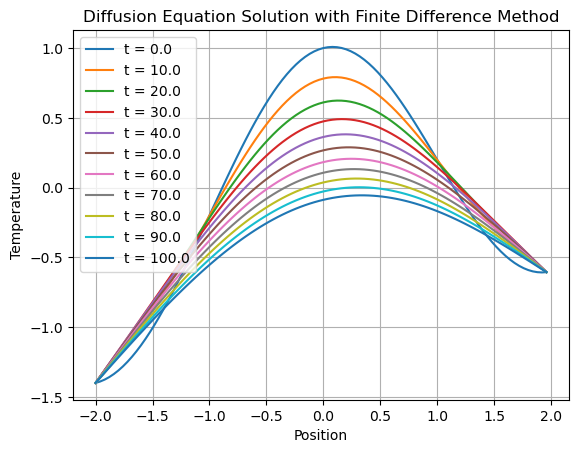

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters
L = 2.0  # Length of the domain
D = 0.01  # Diffusion coefficient

# Time-stepping
t = 0
dt = 0.01

# Discretization
N = 100  # Number of spatial points
x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

# Initial condition
u0 = np.cos(np.pi * x/L) + x/5
u = u0

# Boundary conditions
uL = u0[0]
uR = u0[-1]

A = np.diag(-2*np.ones(N)) + \
    np.diag(1*np.ones(N-1), k=1) + \
    np.diag(1*np.ones(N-1), k=-1)

A = A * D / dx**2 * dt

# Impose boundary conditions
A[0,0] = 0
A[0,1] = 0
A[-1,-2] = 0
A[-1,-1] = 0

U = expm(A)

tmax = 100.1
while t < tmax:
    if (t % 10) < dt:
        plt.plot(x, u, label='t = %.1f' % t)
        plt.xlabel('Position')
        plt.ylabel('Temperature')
        plt.title('Diffusion Equation Solution with Finite Difference Method')
        plt.grid(True)
        plt.legend()

    # Time-stepping
    u = np.dot(U, u)
    # u[0] = u[1] # Neumann boundary conditions (comment for Dirichlet)
    # u[-1] = u[-2]
    t += dt

## Discrete Fourier Transform (DFT)

### DFT matrix

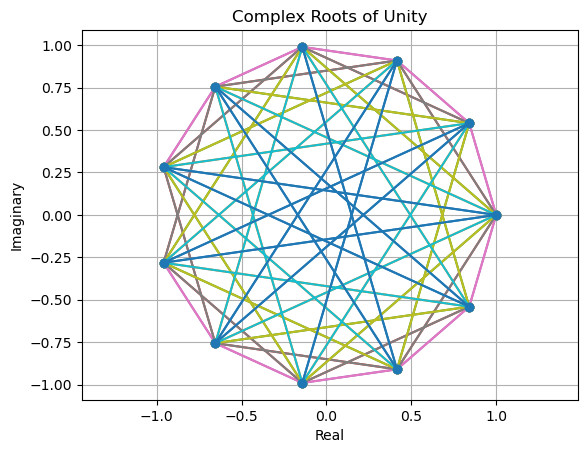

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 11
L = 1
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k_dft = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

F = np.array([np.exp(-1j * k_dft[nk] * x) for nk in range(N)])

plt.plot(F.real.T, F.imag.T, 'o-')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Roots of Unity')
plt.grid(True)
plt.axis('equal')
plt.show()

In [10]:
from tabulate import tabulate

print(tabulate(F[0:3,0:3].real, tablefmt="grid"))
print(tabulate(F[0:3,0:3].imag, tablefmt="grid"))

+-----------+-----------+-----------+
| -0.142315 |  0.415415 | -0.654861 |
+-----------+-----------+-----------+
|  0.415415 | -0.959493 |  0.841254 |
+-----------+-----------+-----------+
| -0.654861 |  0.841254 |  0.415415 |
+-----------+-----------+-----------+
+-----------+-----------+-----------+
| -0.989821 |  0.909632 | -0.75575  |
+-----------+-----------+-----------+
|  0.909632 | -0.281733 | -0.540641 |
+-----------+-----------+-----------+
| -0.75575  | -0.540641 |  0.909632 |
+-----------+-----------+-----------+


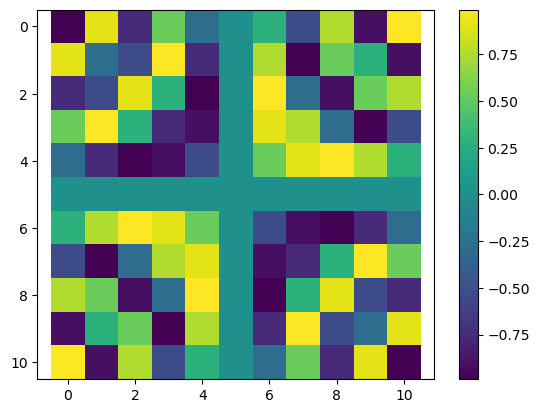

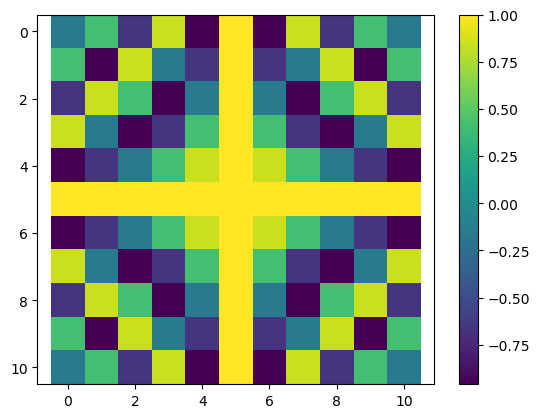

In [53]:
N = 11
L = 1
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k_dft = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

F = np.array([np.exp(-1j * k_dft[nk] * x) for nk in range(N)])

plt.imshow(F.imag)
plt.colorbar()
plt.axis('equal')
plt.show()
plt.imshow(F.real)
plt.colorbar()
plt.axis('equal')
plt.show()

### Derivatives using DFT

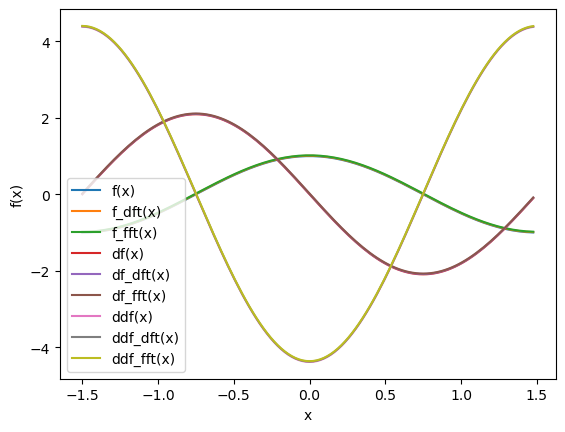

In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 128
L = 3
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k_dft = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

f = np.cos(2*np.pi * x / L)
df = - 2*np.pi/L * np.sin(2*np.pi * x / L)
ddf = -(2*np.pi/L)**2 * np.cos(2*np.pi * x / L)

F = np.array([np.exp(-1j * k_dft[nk] * x) for nk in range(N)])

# Compute the derivative df and ddf using the DFT
f_hat_dft = np.dot(F, f) / N
f_dft = np.dot(F.conj(), f_hat_dft)
df_hat_dft = 1j * k_dft * f_hat_dft
df_dft = np.dot(F.conj(), df_hat_dft)
ddf_hat_dft = -k_dft**2 * f_hat_dft
ddf_dft = np.dot(F.conj(), ddf_hat_dft)

# Compute the derivative df and ddf using the FFT
f_hat_fft = np.fft.fft(f)
f_fft = np.fft.ifft(f_hat_fft)
k_fft = 2 * np.pi * np.fft.fftfreq(N, dx)
df_hat_fft = 1j * k_fft * f_hat_fft
df_fft = np.fft.ifft(df_hat_fft)
ddf_hat_fft = -k_fft**2 * f_hat_fft
ddf_fft = np.fft.ifft(ddf_hat_fft)

plt.plot(x, f, label='f(x)')
plt.plot(x, f_dft+0.01, label='f_dft(x)')
plt.plot(x, f_fft+0.02, label='f_fft(x)')
plt.plot(x, df, label='df(x)')
plt.plot(x, df_dft + 0.01, label='df_dft(x)')
plt.plot(x, df_fft + 0.02, label='df_fft(x)')
plt.plot(x, ddf, label='ddf(x)')
plt.plot(x, ddf_dft + 0.01, label='ddf_dft(x)')
plt.plot(x, ddf_fft + 0.02, label='ddf_fft(x)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

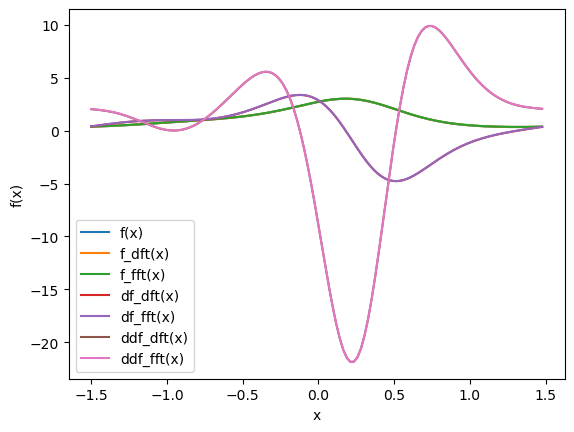

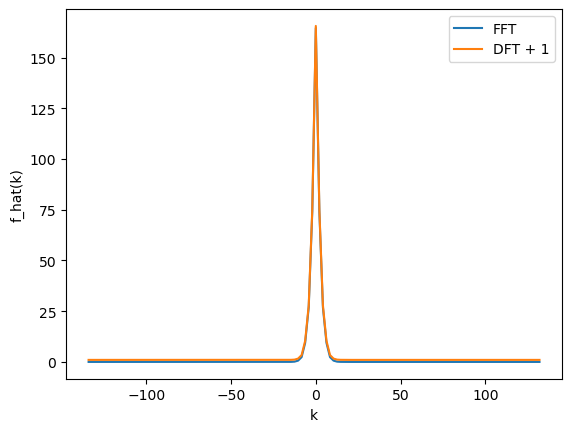

In [37]:
import numpy as np
import matplotlib.pyplot as plt

N = 128
L = 3
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k_dft = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

f = np.exp(np.cos(2*np.pi * x / L) + np.sin(4*np.pi * x / L)/4)

F = np.array([np.exp(-1j * k_dft[nk] * x) for nk in range(N)])

# Compute the derivative df and ddf using the DFT
f_hat_dft = np.dot(F, f) / N
f_dft = np.dot(F.conj(), f_hat_dft)
df_hat_dft = 1j * k_dft * f_hat_dft
df_dft = np.dot(F.conj(), df_hat_dft)
ddf_hat_dft = -k_dft**2 * f_hat_dft
ddf_dft = np.dot(F.conj(), ddf_hat_dft)

# Compute the derivative df and ddf using the FFT
f_hat_fft = np.fft.fft(f)
f_fft = np.fft.ifft(f_hat_fft)
k_fft = 2 * np.pi * np.fft.fftfreq(N, dx)
df_hat_fft = 1j * k_fft * f_hat_fft
df_fft = np.fft.ifft(df_hat_fft)
ddf_hat_fft = -k_fft**2 * f_hat_fft
ddf_fft = np.fft.ifft(ddf_hat_fft)

plt.plot(x, f, label='f(x)')
plt.plot(x, f_dft+0.01, label='f_dft(x)')
plt.plot(x, f_fft+0.02, label='f_fft(x)')
plt.plot(x, df_dft + 0.01, label='df_dft(x)')
plt.plot(x, df_fft + 0.02, label='df_fft(x)')
plt.plot(x, ddf_dft + 0.01, label='ddf_dft(x)')
plt.plot(x, ddf_fft + 0.02, label='ddf_fft(x)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

sort_index = np.argsort(k_fft)
k_fft = k_fft[sort_index]
f_hat_fft = f_hat_fft[sort_index]

plt.plot(k_fft,np.abs(f_hat_fft),label='FFT')
plt.plot(k_dft,np.abs(N*f_hat_dft)+1,label='DFT + 1')
plt.xlabel('k')
plt.ylabel('f_hat(k)')
plt.legend()
plt.show()

### Finite difference from DFT

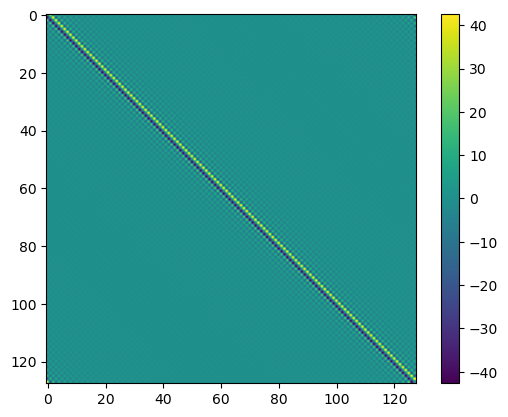

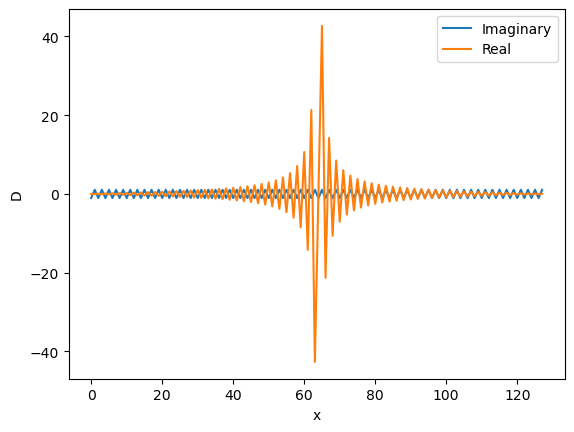

In [57]:
# Finite difference matrix from DFT

N = 128
L = 3
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k_dft = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

F = np.array([np.exp(-1j * k_dft[nk] * x) for nk in range(N)])

D = np.dot(np.diag(1j*k_dft), F/N)
D = np.dot(F.conj(),D)

DD = np.dot(D,D)

plt.imshow(np.real(D))
plt.colorbar()
plt.show()

plt.plot(D[N//2,:].imag,label='Imaginary')
plt.plot(D[N//2,:].real,label='Real')
plt.xlabel('x')
plt.ylabel('D')
plt.legend()
plt.show()


In [43]:
from tabulate import tabulate
print(tabulate(D[0:8,0:8].real/D[0,1], tablefmt="grid"))
print(tabulate(DD[0:8,0:8].real/DD[0,1], tablefmt="grid"))

+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|  2.31523e-16 |  0.999398    | -0.499398    |  0.332597    | -0.249096    |  0.198915    | -0.165394    |  0.141392    |
+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| -0.999398    | -1.93101e-14 |  0.999398    | -0.499398    |  0.332597    | -0.249096    |  0.198915    | -0.165394    |
+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|  0.499398    | -0.999398    |  8.61465e-15 |  0.999398    | -0.499398    |  0.332597    | -0.249096    |  0.198915    |
+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| -0.332597    |  0.499398    | -0.999398    |  1.04458e-14 |  0.999398    | -0.499398    |  0.332597    | -0.249096    |
+--------------+--------

/Users/seymur/opt/miniconda3/envs/new-env/lib/python3.10/site-packages/tabulate/__init__.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  conv(string)
/Users/seymur/opt/miniconda3/envs/new-env/lib/python3.10/site-packages/tabulate/__init__.py:1232: ComplexWarning: Casting complex values to real discards the imaginary part
  return format(float(val), floatfmt)


In [46]:
np.pi**2/6

1.6449340668482264

/Users/seymur/opt/miniconda3/envs/new-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


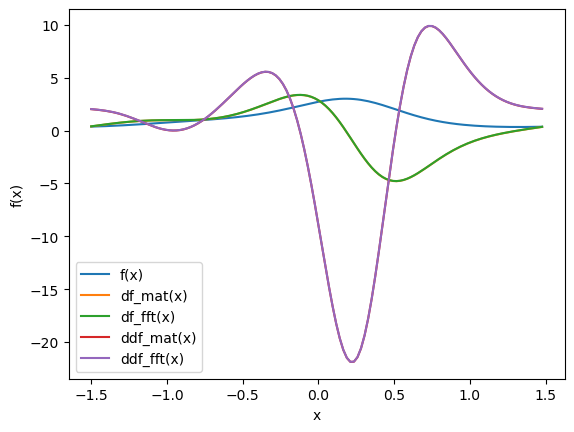

In [58]:
import numpy as np
import matplotlib.pyplot as plt

N = 128
L = 3
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k_dft = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

f = np.exp(np.cos(2*np.pi * x / L) + np.sin(4*np.pi * x / L)/4)

F = np.array([np.exp(-1j * k_dft[nk] * x) for nk in range(N)])

D = np.dot(np.diag(1j*k_dft), F/N)
D = np.dot(F.conj(),D)

DD = np.dot(D,D)

# Compute the derivative df and ddf using the Finite Difference Matrix
df_mat = np.dot(D,f)
ddf_mat = np.dot(DD,f)

# Compute the derivative df and ddf using the FFT
f_hat_fft = np.fft.fft(f)
f_fft = np.fft.ifft(f_hat_fft)
k_fft = 2 * np.pi * np.fft.fftfreq(N, dx)
df_hat_fft = 1j * k_fft * f_hat_fft
df_fft = np.fft.ifft(df_hat_fft)
ddf_hat_fft = -k_fft**2 * f_hat_fft
ddf_fft = np.fft.ifft(ddf_hat_fft)

plt.plot(x, f, label='f(x)')
plt.plot(x, df_mat, label='df_mat(x)')
plt.plot(x, df_fft + 0.01, label='df_fft(x)')
plt.plot(x, ddf_mat, label='ddf_mat(x)')
plt.plot(x, ddf_fft + 0.01, label='ddf_fft(x)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()